In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Titanic-Dataset.csv') 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [14]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [15]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Titanic-Dataset.csv') 

In [5]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [6]:
print(df[['Sex']].head())

   Sex
0    0
1    1
2    1
3    1
4    0


In [7]:
embarked_dummies=pd.get_dummies(df.Embarked)
embarked_dummies

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [9]:
merged=pd.concat([df,embarked_dummies],axis='columns')
merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,True,False,False


In [10]:
df.drop('Embarked', axis=1, inplace=True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN


In [12]:
cabin_dummies = pd.get_dummies(df['Cabin'], prefix='Cabin')

In [13]:
cabin_dummies

,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df = pd.concat([df, cabin_dummies], axis=1)
df.drop('Cabin', axis=1, inplace=True)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,...,False,False,False,False,False,False,False,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,...,False,False,False,False,False,False,False,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,...,False,False,False,False,False,False,False,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,...,False,False,False,False,False,False,False,False,False,False


In [4]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Titanic-Dataset.csv') 
std_scaler=StandardScaler()
res=std_scaler.fit_transform(df[["Age","Fare"]])

In [5]:
res

array([[-0.53037664, -0.50244517],
       [ 0.57183099,  0.78684529],
       [-0.25482473, -0.48885426],
       ...,
       [        nan, -0.17626324],
       [-0.25482473, -0.04438104],
       [ 0.15850313, -0.49237783]], shape=(891, 2))

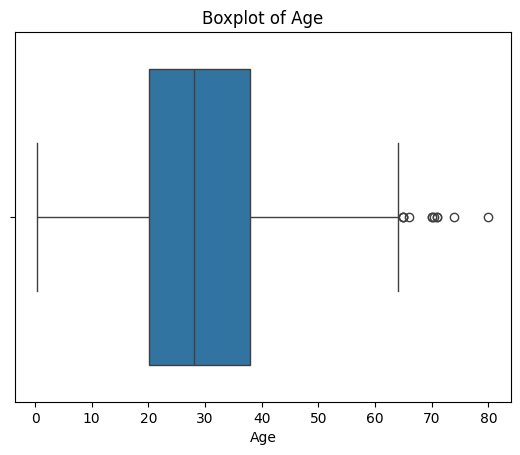

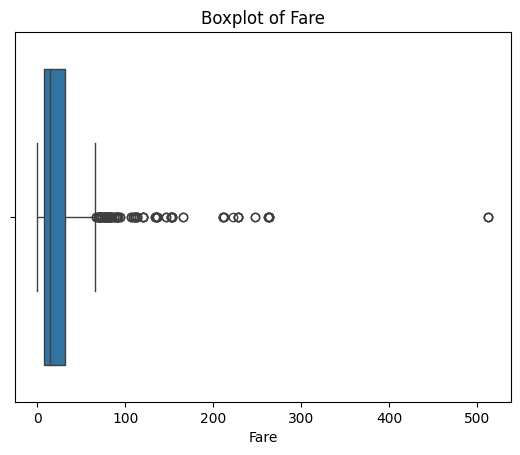

In [4]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
df = pd.read_csv('Titanic-Dataset.csv') 

sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()


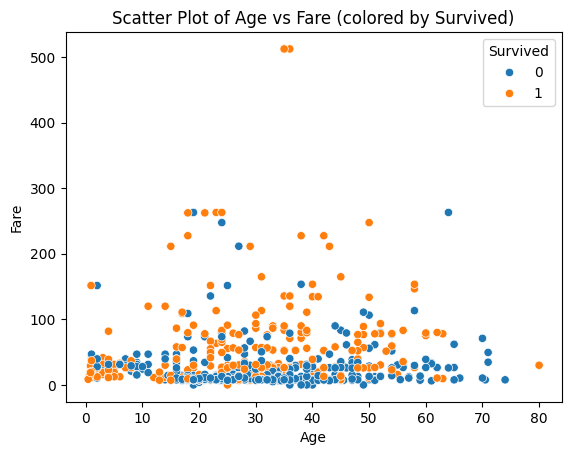

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Scatter Plot of Age vs Fare (colored by Survived)')
plt.show()


In [7]:
##zscore
upper = df['Age'].mean() + 3 * df['Age'].std()
lower = df['Age'].mean() - 3 * df['Age'].std()
print("upper limit: ",upper)
print("lower limit: ",lower)

upper limit:  73.27860964406094
lower limit:  -13.880374349943303


In [10]:
##finding outliers
df.loc[(df['Age']>upper) | (df['Age']<lower)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [13]:
##trimming - deleting outlier data
new_df=df.loc[(df['Age']<upper)&(df['Age']>lower)]
print("new: ",len(new_df))
print("old :",len(df))
print("diff: ",len(df)-len(new_df))

new:  712
old : 891
diff:  179


In [14]:
print("NaNs in Age:", df['Age'].isnull().sum())

NaNs in Age: 177


In [15]:
print("Non-null Age rows:", df['Age'].notnull().sum())

Non-null Age rows: 714


In [16]:
print("Outliers:", ((df['Age'] > upper) | (df['Age'] < lower)).sum())

Outliers: 2


In [19]:
new_df = df.loc[((df['Age'] < upper) & (df['Age'] > lower)) | (df['Age'].isnull())]
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
##finding outliers
df.loc[(df['Age']>upper) | (df['Age']<lower)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [21]:
#capping
new_df=df.copy()
new_df.loc[new_df['Age']>upper,'Age']=upper
new_df.loc[new_df['Age']<lower,'Age']=lower

<Axes: ylabel='Age'>

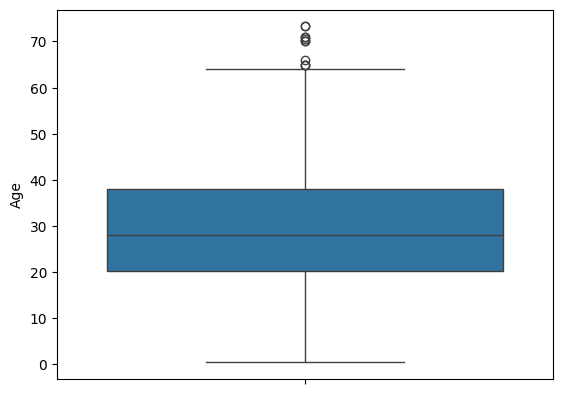

In [23]:
sns.boxplot(new_df['Age'])

In [24]:
len(new_df)

891

In [33]:
#IQR Method 
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
UPPER=Q3+(1.5*IQR)
LOWER=Q1-(1.5*IQR)
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
LOWER,UPPER

(np.float64(-7.0), np.float64(65.0))

<Axes: ylabel='Age'>

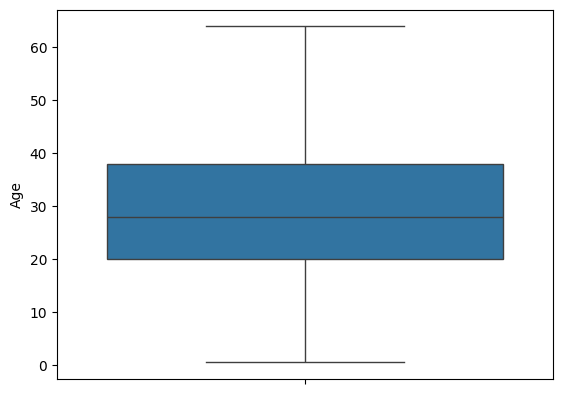

In [34]:
sns.boxplot(df['Age'])

In [31]:
##trimming - deleting outlier data
new_df=df.loc[(df['Age']<upper)&(df['Age']>lower)]
print("new: ",len(new_df))
print("old :",len(df))
print("diff: ",len(df)-len(new_df))

new:  703
old : 703
diff:  0


<Axes: ylabel='Age'>

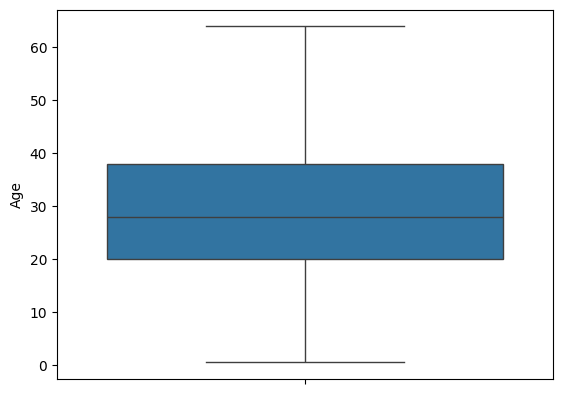

In [32]:
sns.boxplot(df['Age'])

In [36]:
#capping
new_df=df.copy()
new_df.loc[new_df['Age']>upper,'Age']=upper
new_df.loc[new_df['Age']<lower,'Age']=lower

<Axes: ylabel='Age'>

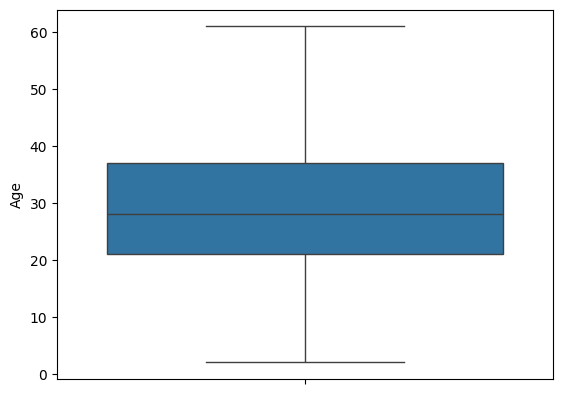

In [48]:
sns.boxplot(new_df['Age'])

In [38]:
# percentile method 

In [49]:
upper=df['Age'].quantile(0.99)
lower=df['Age'].quantile(0.01)
print(upper)
print(lower)

61.98000000000002
1.0


<Axes: ylabel='Age'>

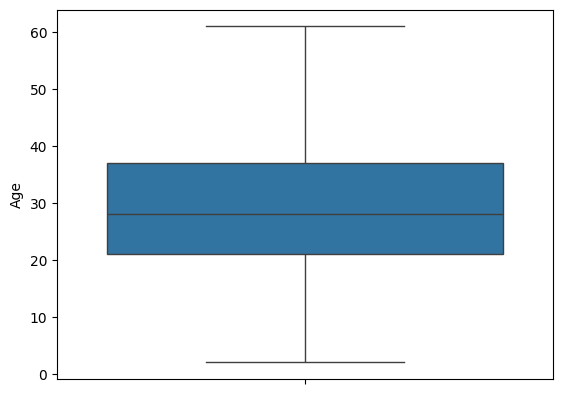

In [47]:
sns.boxplot(new_df['Age'])

In [43]:
df.loc[(df['Age']>upper)|(df['Age']<lower)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.5500,C87,S
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.00,0,0,4134,9.5875,NaN,S
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.00,0,0,693,26.0000,NaN,S
555,556,0,1,"Wright, Mr. George",male,62.00,0,0,113807,26.5500,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.00,0,0,S.W./PP 752,10.5000,NaN,S


In [45]:
##trimming - deleting outlier data
new_df=df.loc[(df['Age']<=upper)&(df['Age']>lower)]
print("new: ",len(new_df))
print("old :",len(df))
print("diff: ",len(df)-len(new_df))

new:  681
old : 703
diff:  22


<Axes: ylabel='Age'>

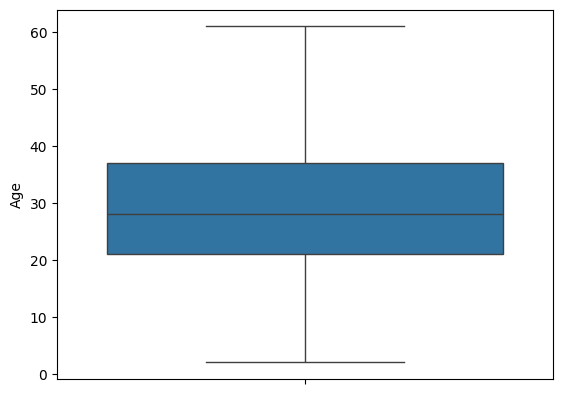

In [46]:
sns.boxplot(new_df['Age'])

In [50]:
upper=df['Age'].quantile(0.99)
lower=df['Age'].quantile(0.01)
print(upper)
print(lower)

61.98000000000002
1.0


<Axes: ylabel='Age'>

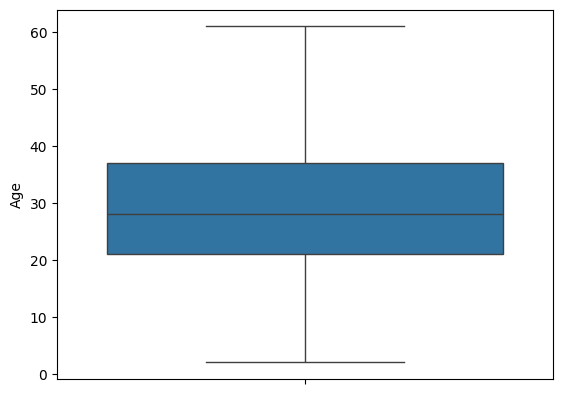

In [51]:
sns.boxplot(new_df['Age'])

C:\Users\NITHARSANA\AppData\Local\Temp\ipykernel_12836\366217279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

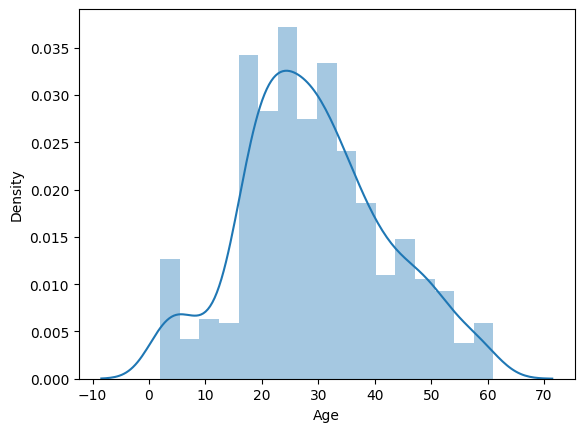

In [52]:
sns.distplot(new_df['Age'])

In [4]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
df = pd.read_csv('Titanic-Dataset.csv')
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
df_cleaned = df[(df['Fare'] > lower_bound) & (df['Fare'] < upper_bound)]
print(len(df_cleaned))

775


<Axes: ylabel='Fare'>

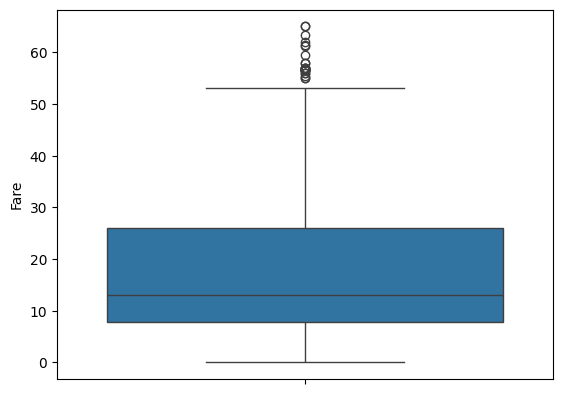

In [11]:
sns.boxplot(df_cleaned['Fare'])

In [15]:
##trimming - deleting outlier data
df_cleaned = df[(df['Fare'] > lower_bound) & (df['Fare'] < upper_bound)]
print("new: ",len(df_cleaned))
print("old :",len(df))
print("diff: ",len(df)-len(df_cleaned))

new:  775
old : 891
diff:  116


In [17]:
#capping
df_cleaned=df.copy()
df_cleaned.loc[df_cleaned['Fare']>upper_bound,'Fare']=upper_bound
df_cleaned.loc[df_cleaned['Fare']<lower_bound,'Fare']=lower_bound

<Axes: ylabel='Fare'>

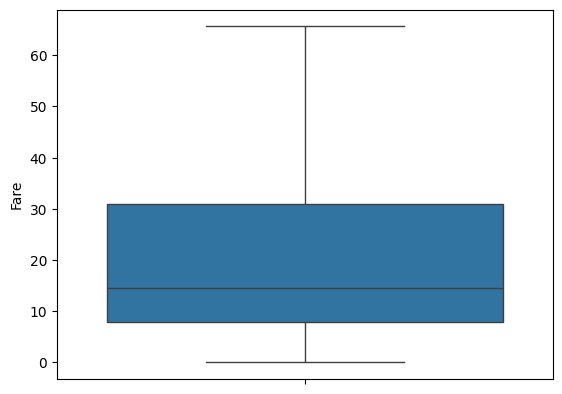

In [18]:
sns.boxplot(df_cleaned['Fare'])